# **Load Dataset**

In [163]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/cars.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (5076, 18)


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


**Finding Instances(Observations)**

In [164]:
num_instances = df.shape[0]
print("Number of Instances:", num_instances)


Number of Instances: 5076


# **Numerical And Categorical Values**

In [165]:
numerical = df.select_dtypes(include=['number']).columns
categorical = df.select_dtypes(include=['object', 'bool']).columns

print("Numerical variables:", len(numerical))
print("Categorical variables:", len(categorical))


Numerical variables: 9
Categorical variables: 9


**Identifying Missing Values**

In [166]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64


# **Identifying and Drop Duplicates**

In [167]:
num_duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", num_duplicates)


Number of Duplicate Rows: 18


In [168]:
df=df.drop_duplicates()
num_duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", num_duplicates)


Number of Duplicate Rows: 0


# **Feature Selection**

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = [
    "Engine Information.Engine Type",
    "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque",
    "Engine Information.Number of Forward Gears",
    "Fuel Information.Fuel Type",
    "Fuel Information.Highway mpg",
    "Fuel Information.City mpg",
    "Dimensions.Height",
    "Dimensions.Width",
    "Dimensions.Length",
]

df = df[features].dropna()
print("Dataset Shape after dropping missing values:", df.shape)
print(df.describe())

Dataset Shape after dropping missing values: (5058, 10)
       Engine Information.Engine Statistics.Horsepower  \
count                                      5058.000000   
mean                                        270.559312   
std                                          95.332497   
min                                         100.000000   
25%                                         190.000000   
50%                                         266.000000   
75%                                         317.000000   
max                                         638.000000   

       Engine Information.Engine Statistics.Torque  \
count                                  5058.000000   
mean                                    272.682483   
std                                     100.146014   
min                                      98.000000   
25%                                     187.000000   
50%                                     260.000000   
75%                                     335

**Handle Categorical Variables (Label Encoding)**

In [170]:
categorical_vars = ["Engine Information.Engine Type", "Fuel Information.Fuel Type"]
encoder = LabelEncoder()
for var in categorical_vars:
    df[var] = encoder.fit_transform(df[var])



# **Compute Correlation Matrix (For Analysis)**

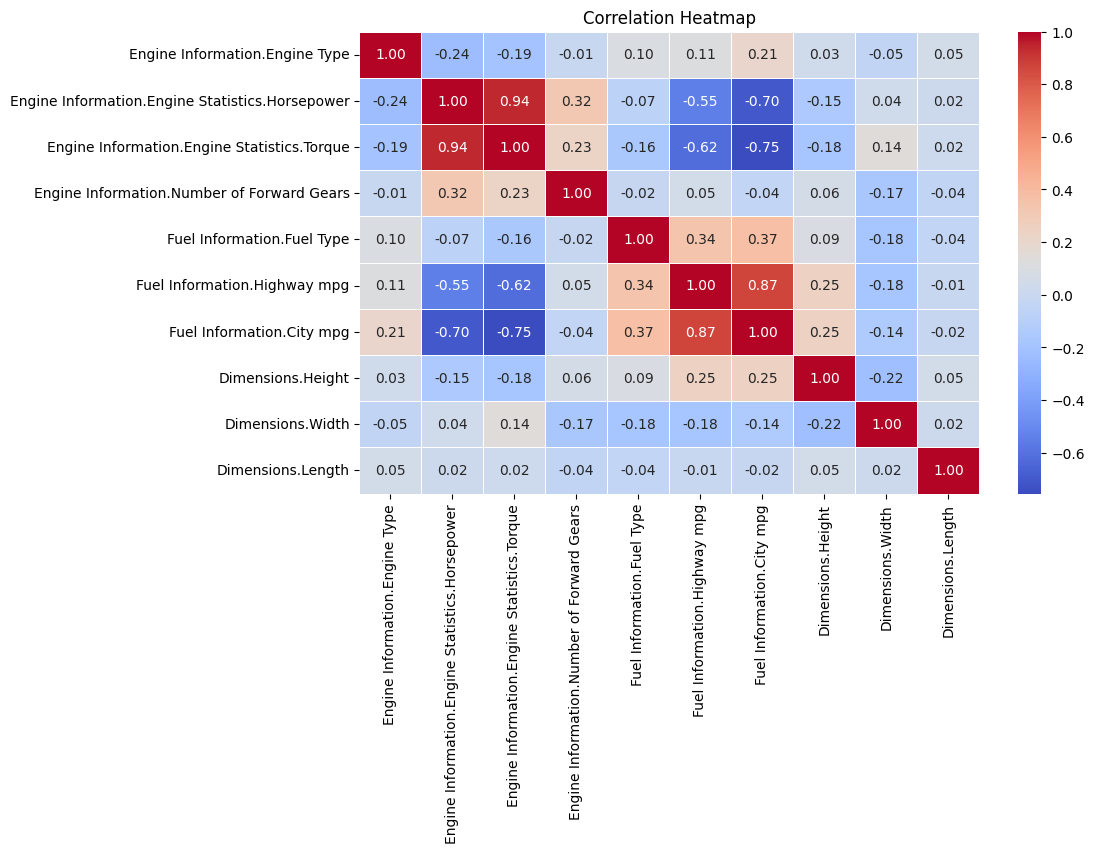

In [171]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Display top correlated features**

In [172]:
target = "Fuel Information.Highway mpg"
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)


print("\nTop Features Correlated with Highway Mileage:")
print(correlation_with_target)


Top Features Correlated with Highway Mileage:
Fuel Information.City mpg                          0.865617
Engine Information.Engine Statistics.Torque        0.617965
Engine Information.Engine Statistics.Horsepower    0.548200
Fuel Information.Fuel Type                         0.341441
Dimensions.Height                                  0.245169
Dimensions.Width                                   0.181577
Engine Information.Engine Type                     0.110150
Engine Information.Number of Forward Gears         0.052588
Dimensions.Length                                  0.010934
Name: Fuel Information.Highway mpg, dtype: float64


**Plot correlation with target**

<ipython-input-173-33281adf3040>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="coolwarm")


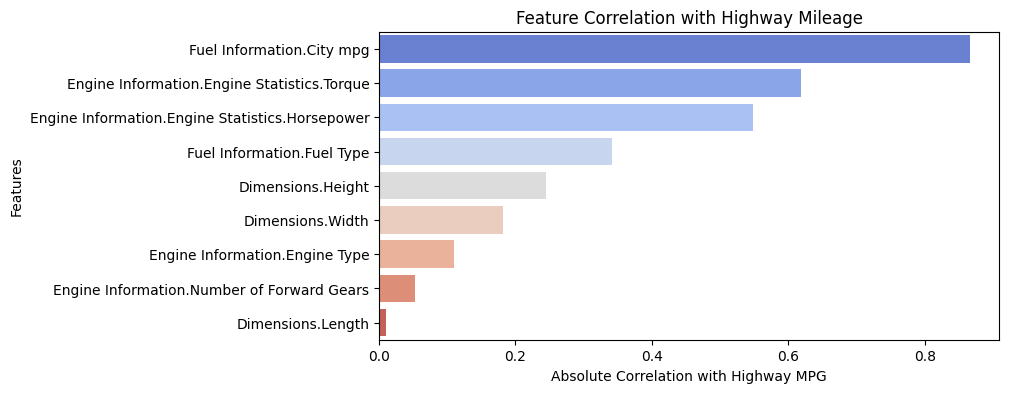

In [173]:
plt.figure(figsize=(8, 4))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="coolwarm")
plt.xlabel("Absolute Correlation with Highway MPG")
plt.ylabel("Features")
plt.title("Feature Correlation with Highway Mileage")
plt.show()

# **Check for Multicollinearity Using VIF**

In [174]:
X = df.drop(columns=[target])
y = df[target]

X["Intercept"] = 1

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data[vif_data["Feature"] != "Intercept"]
print("\nVariance Inflation Factor (VIF) Scores:")
print(vif_data)


Variance Inflation Factor (VIF) Scores:
                                           Feature        VIF
0                   Engine Information.Engine Type   1.105728
1  Engine Information.Engine Statistics.Horsepower  11.032397
2      Engine Information.Engine Statistics.Torque  11.198253
3       Engine Information.Number of Forward Gears   1.297829
4                       Fuel Information.Fuel Type   1.341164
5                        Fuel Information.City mpg   3.009046
6                                Dimensions.Height   1.116042
7                                 Dimensions.Width   1.186891
8                                Dimensions.Length   1.012697


# **Remove Features**

In [198]:
vif_threshold = 5
selected_features = vif_data[vif_data["VIF"] < vif_threshold]["Feature"].tolist()
X_selected = X[selected_features]

print("\nFeatures selected after removing high VIF values:")
print(selected_features)


Features selected after removing high VIF values:
['Engine Information.Engine Type', 'Engine Information.Number of Forward Gears', 'Fuel Information.Fuel Type', 'Fuel Information.City mpg', 'Dimensions.Height', 'Dimensions.Width', 'Dimensions.Length']


## Handle Outliers Using IQR Method

In [191]:
df_selected = df[selected_features + [target]]

Q1 = df_selected[selected_features].quantile(0.25)
Q3 = df_selected[selected_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_selected[~((df_selected[selected_features] < lower_bound) | (df_selected[selected_features] > upper_bound)).any(axis=1)]

print("\nOriginal Shape:", df_selected.shape)
print("After IQR Outlier Removal:", df_cleaned.shape)


Original Shape: (5058, 8)
After IQR Outlier Removal: (4461, 8)


# **Feature Distribution Visualization**

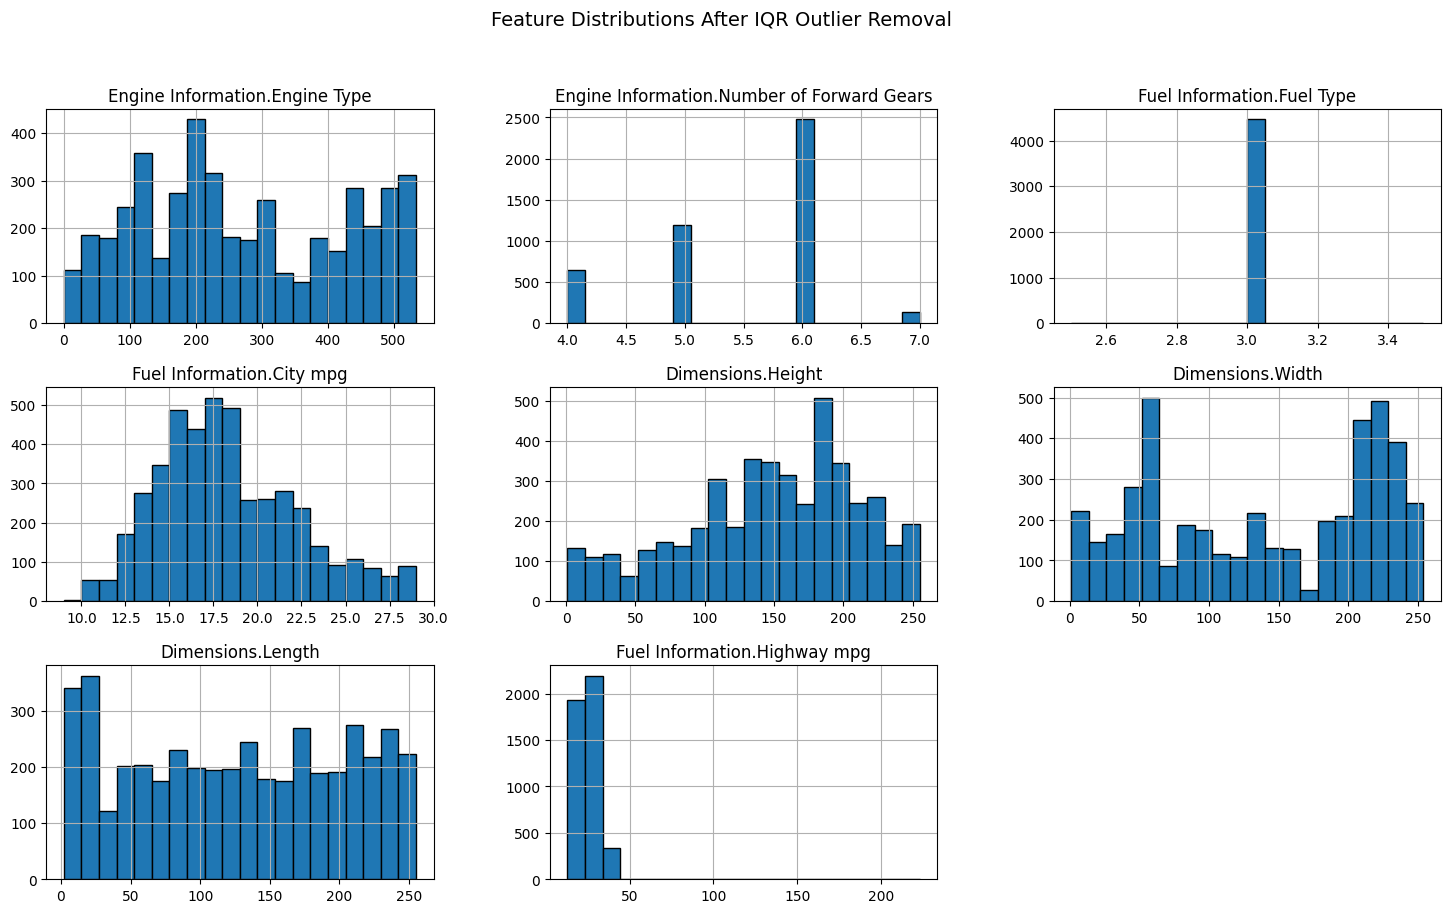

In [180]:
df_cleaned.hist(figsize=(18, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions After IQR Outlier Removal", fontsize=14)
plt.show()


# **Training  And  Tesing**

In [206]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(df_cleaned[selected_features])
y_cleaned = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_cleaned, test_size=0.15, random_state=44, shuffle=True)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# **Evaluation**

In [207]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print("\n Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Model Accuracy: {accuracy:.2f}%")


 Model Performance:
Mean Squared Error (MSE): 1.9807
Root Mean Squared Error (RMSE): 1.4074
R² Score: 0.9270
Model Accuracy: 92.70%


#  Actual vs. Predicted Visualization

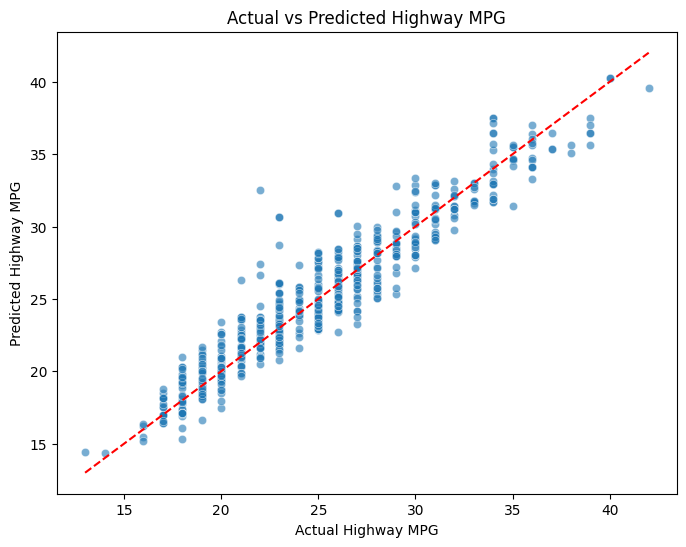

In [183]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Highway MPG")
plt.ylabel("Predicted Highway MPG")
plt.title("Actual vs Predicted Highway MPG")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()

# **Residual Analysis (Normality Check)**

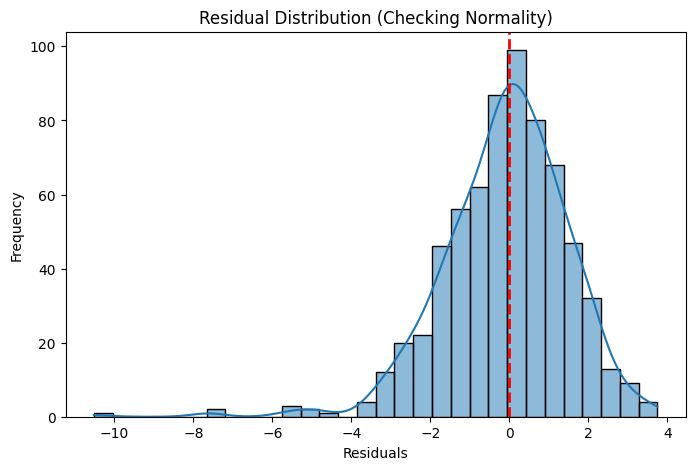

In [184]:
 residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Checking Normality)")
plt.show()